In [1]:
import numpy as np
import pandas as pd
import numpy.random as random
import scipy.fft as sfft
sys.path.insert(0, '../../Libraries')
from ltar import LTAR
import JacksonsTSPackage as jts
from statsmodels.tsa.api import VAR

In [2]:
def mul_ten_and_mat(tensor, matrix):
    
    matrix_shape = matrix.shape
    ten_length = len(tensor)
    ten_sqr = ten_length*ten_length
    block_matrix = np.zeros((ten_sqr, ten_sqr))

    # Makes the block vector
    trans_vector = sfft.dct(matrix, axis=1)
    block_vector = trans_vector.transpose().reshape(ten_sqr)

    # Makes the block matrix
    transform_tensor = sfft.dct(tensor, axis=0)
    for i in range(ten_length):
        c = i * 3
        block_matrix[c:c+3,c:c+3] = transform_tensor[i]

    result_block_vector = np.matmul(block_matrix, block_vector)
    result_trans_matrix = result_block_vector.reshape(matrix_shape).transpose()
    result_matrix = sfft.idct(result_trans_matrix, axis=1)

    return result_matrix

N = 2000
A =np.array(
    [[
        [-0.2, 0, 0],
        [0, -0.2, 0],
        [0, 0, -0.2]
    ],
    [
        [0.2, 0, 0],
        [0, 0.2, 0],
        [0, 0, 0.2]
    ],
    [
        [-0.2, 0, 0],
        [0, -0.2, 0],
        [0, 0, -0.2]
    ]]
    )

tmp = np.array(
    [
        [0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1]
    ])

data_tensor = np.zeros((N, 3, 3))
data_tensor[0] = tmp
for i in range(1, N):
    data_tensor[i] = mul_ten_and_mat(A, data_tensor[i-1]) + random.uniform(-1, 1, (3, 3)) + tmp
data_tensor.shape

(2000, 3, 3)

In [3]:
A

array([[[-0.2,  0. ,  0. ],
        [ 0. , -0.2,  0. ],
        [ 0. ,  0. , -0.2]],

       [[ 0.2,  0. ,  0. ],
        [ 0. ,  0.2,  0. ],
        [ 0. ,  0. ,  0.2]],

       [[-0.2,  0. ,  0. ],
        [ 0. , -0.2,  0. ],
        [ 0. ,  0. , -0.2]]])

In [4]:
vectorized = pd.DataFrame(jts.tensor_to_vector(data_tensor))
vectorized

,0,1,2,3,4,5,6,7,8
0,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0.557196,0.840082,0.272528,-0.572911,0.427880,-0.491481,-0.474440,0.637050,-0.750425
2,-0.381612,-1.173984,-0.083453,0.648393,-0.036575,0.714233,-0.788875,-0.253442,-0.819487
3,0.336791,-0.224348,0.728662,-1.071069,0.268348,-0.952748,0.831205,0.449493,0.661017
4,-0.417389,1.002572,-0.903214,1.165088,0.100137,0.714822,-0.855825,0.464741,0.530188
...,...,...,...,...,...,...,...,...,...
1995,0.862489,0.481406,0.684415,-1.411715,0.251433,-1.250682,-0.917293,0.640916,1.596745
1996,-0.096705,-0.658793,0.221206,1.633094,0.203875,1.287278,0.546678,-0.061650,-0.207546
1997,0.287946,0.971831,1.081083,-0.467327,-1.083249,0.132191,-0.393034,0.245722,-0.640691
1998,-0.480721,-0.948207,-0.673629,-0.427151,0.183992,-0.257400,-0.417008,-0.127012,-0.897098


Text(0, 0.5, 'Norm of Y_t')

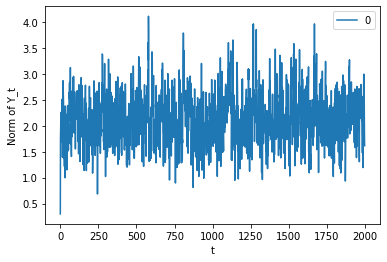

In [5]:
norms = []
for i in range(N):
    norms.append(np.linalg.norm(data_tensor[i], ord="fro"))
ax = pd.DataFrame(norms).plot()
ax.set_xlabel("t")
ax.set_ylabel("Norm of Y_t")

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

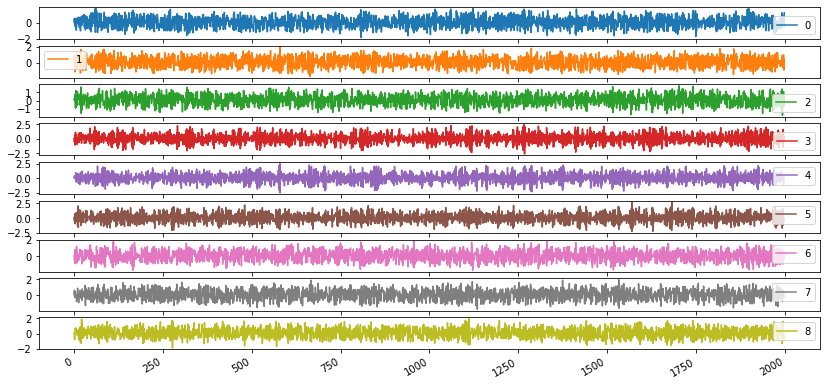

In [6]:
vectorized.plot(figsize = (14, 7), subplots = True)

In [7]:
N_train = 1800
N_test = N - N_train
print(f"N: {N}")
print(f"N_train: {N_train}")
print(f"N_test: {N_test}")

N: 2000
N_train: 1800
N_test: 200


In [8]:
train_tensor = jts.extract_train_tensor(data_tensor, N_train)
test_tensor = jts.extract_test_tensor(data_tensor, N_train, N_test)

In [9]:
train_tensor

array([[[ 0.1       ,  0.1       ,  0.1       ],
        [ 0.1       ,  0.1       ,  0.1       ],
        [ 0.1       ,  0.1       ,  0.1       ]],

       [[ 0.55719629, -0.57291141, -0.4744396 ],
        [ 0.84008163,  0.42788016,  0.63705025],
        [ 0.27252837, -0.49148064, -0.75042477]],

       [[-0.38161178,  0.64839335, -0.78887536],
        [-1.17398352, -0.03657518, -0.25344189],
        [-0.08345337,  0.71423312, -0.81948668]],

       ...,

       [[ 0.20288231,  1.05801724,  0.46312271],
        [ 1.02040216, -0.65131286,  0.03494854],
        [ 1.37340151,  0.22743463,  0.43005497]],

       [[-0.51640029, -0.50010215, -0.41909448],
        [-0.13621886,  0.75354715, -0.12603262],
        [ 0.19532416,  0.33764281, -1.01970817]],

       [[-0.07599968, -0.09829027, -0.50158874],
        [ 0.82906313,  0.22293428, -0.34590987],
        [-0.61203696, -0.3847093 ,  0.81566736]]])

In [10]:
model = LTAR(train_tensor)
model.fit(1)
result_tensor = model.forecast(N_test)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

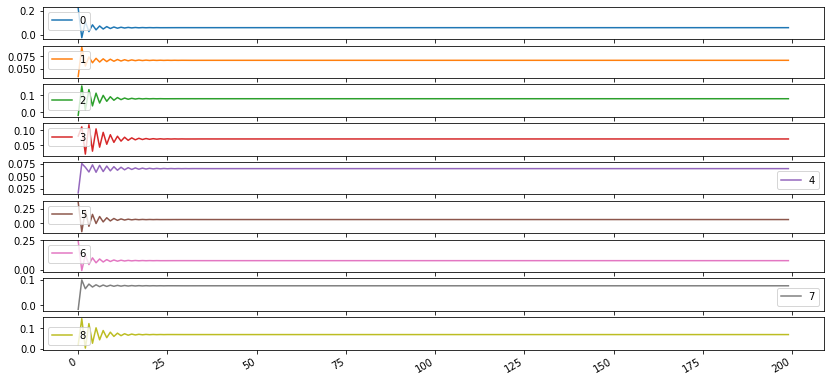

In [11]:
result_vectorized = pd.DataFrame(jts.tensor_to_vector(result_tensor))
result_vectorized.plot(figsize = (14, 7), subplots = True)

In [12]:
model.coefs

array([[[[-0.18480284, -0.00415011, -0.00027831],
         [-0.00585089, -0.18936658, -0.01356652],
         [-0.00047684, -0.00432267, -0.18847597]],

        [[ 0.20315445,  0.00423465, -0.00531316],
         [-0.00786409,  0.19702349, -0.0063379 ],
         [-0.00039215, -0.01138122,  0.19299073]],

        [[-0.20304595, -0.00121604, -0.0047954 ],
         [ 0.00784535, -0.208564  , -0.00105652],
         [ 0.00086932,  0.00685913, -0.19833282]]]])

In [17]:
model.c

array([[0.08986655, 0.0996236 , 0.10646515],
       [0.10109014, 0.09386188, 0.11019791],
       [0.11149259, 0.09183326, 0.1015347 ]])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

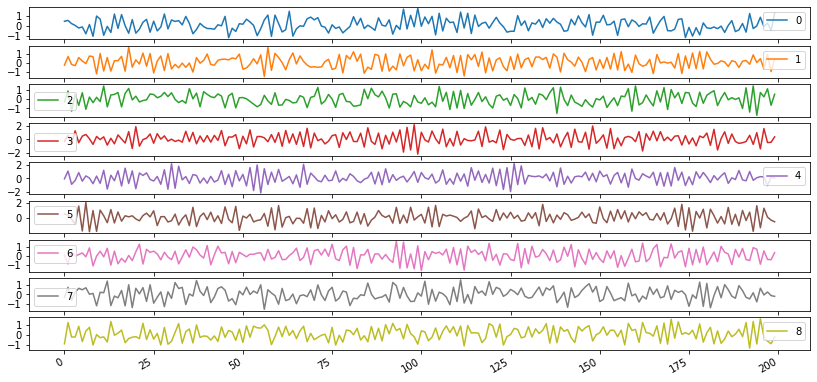

In [13]:
test_vectorized = pd.DataFrame(jts.tensor_to_vector(test_tensor))
test_vectorized.plot(figsize = (14, 7), subplots = True)

In [14]:
error = jts.calc_mape_per_matrix(test_tensor, result_tensor)
error = error.rename(columns={"MAPE": "DFT"})
error

,DFT
0,0.907803
1,0.914881
2,1.03554
3,0.936142
4,0.936088
...,...
195,0.995644
196,0.963918
197,1.00122
198,1.10359


<AxesSubplot:>

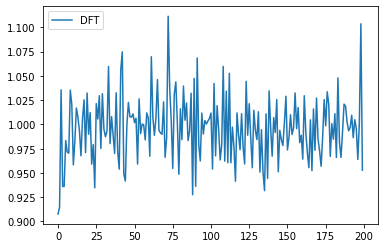

In [15]:
error.plot()

In [16]:
jts.forecast_accuracy(result_vectorized, test_vectorized)

Results
----------------------------------------------------------------------
           ME            MSE            MAE            MAPE
0       -0.037         0.403          0.515          167.688%      
1       -0.017         0.516          0.616          212.713%      
2       0.077          0.447          0.555          112.975%      
3       -0.013         0.826          0.753          111.061%      
4       -0.015         0.777          0.727          120.700%      
5       -0.026         0.672          0.667          118.026%      
6       0.039          0.514          0.599          107.496%      
7       0.057          0.453          0.552          148.771%      
8       -0.030         0.438          0.563          131.096%      
